In [1]:
import pandas as pd
import numpy as np
import os
import glob
import os
import subprocess
import pandas as pd
import numpy as np
from scipy.stats import iqr
from statsmodels.formula.api import ols
from scipy.stats import zscore
from nipype.interfaces.fsl import ImageMaths
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
# Create bar plot
plt.style.use('seaborn-v0_8-poster')
#plt.style.use('seaborn-v0_8')
fontsize = 11
plt.rcParams.update({
    "font.size": fontsize,          # Global font size
    "axes.labelsize": fontsize,     # X and Y axis labels
    "axes.titlesize": fontsize,     # Title (if used)
    "xtick.labelsize": fontsize,    # X-axis tick labels
    "ytick.labelsize": fontsize,    # Y-axis tick labels
    "legend.fontsize": fontsize,    # Legend font size
})

In [2]:
project_dir = '/Users/xiaoqianxiao/projects/OCD'
data_dir = os.path.join(project_dir, 'results/NW_group_roi_roi')
result_dir = os.path.join(project_dir, 'results/visualization/NW_group_roi_roi')
if not os.path.exists(result_dir):
    os.makedirs(result_dir, exist_ok=True)

In [3]:
group_diff_file = os.path.join(data_dir, 'group_diff_baseline_power_2011_roiroi_fc.csv')
df_group_diff = pd.read_csv(group_diff_file)
df_group_diff.sort_values(by='p_value', ascending=True)

,ROI1,ROI2,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_std,HC_std,OCD_n,HC_n,cohens_d,p_corrected,significant
23298,Default_mode_113,Visual_172,Default_mode,Visual,4.240828,0.000109,0.191488,0.026051,0.144884,0.159148,46,25,1.087087,0.979810,False
10693,Sensory_Somatomotor_Mouth_45,Default_mode_113,Sensory_Somatomotor_Mouth,Default_mode,4.261792,0.000113,0.166058,-0.029571,0.159480,0.192367,46,25,1.107183,0.979810,False
23859,Default_mode_117,Default_mode_139,Default_mode,Default_mode,-4.139095,0.000148,0.240113,0.363474,0.111934,0.120979,46,25,-1.058483,0.979810,False
9139,Sensory_Somatomotor_Hand_38,Default_mode_113,Sensory_Somatomotor_Hand,Default_mode,3.998006,0.000159,0.233308,0.079656,0.201258,0.117671,46,25,0.932073,0.979810,False
5921,Sensory_Somatomotor_Hand_24,Visual_150,Sensory_Somatomotor_Hand,Visual,-3.988738,0.000167,0.151045,0.304732,0.194315,0.124467,46,25,-0.941868,0.979810,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,Sensory_Somatomotor_Hand_24,Dorsal_attention_261,Sensory_Somatomotor_Hand,Dorsal_attention,0.000068,0.999946,0.217405,0.217401,0.223485,0.227094,46,25,0.000017,0.999991,False
25259,Default_mode_126,Dorsal_attention_261,Default_mode,Dorsal_attention,0.000062,0.999951,0.101020,0.101017,0.129224,0.154351,46,25,0.000016,0.999991,False
670,Uncertain_3,Visual_149,Uncertain,Visual,0.000026,0.999980,0.131321,0.131320,0.182146,0.193398,46,25,0.000007,0.999991,False
33932,Subcortical_224,Dorsal_attention_261,Subcortical,Dorsal_attention,0.000023,0.999982,0.180885,0.180884,0.197974,0.172961,46,25,0.000006,0.999991,False


In [4]:
df_group_diff.loc[
    (df_group_diff['p_value'] <= 0.05)
]

,ROI1,ROI2,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_std,HC_std,OCD_n,HC_n,cohens_d,p_corrected,significant
7,Uncertain_1,Uncertain_9,Uncertain,Uncertain,3.400827,0.001308,0.197743,0.038390,0.191850,0.181836,46,25,0.852567,0.999991,False
67,Uncertain_1,Auditory_69,Uncertain,Auditory,-2.341877,0.022366,0.098137,0.197947,0.202995,0.147029,46,25,-0.563151,0.999991,False
74,Uncertain_1,Default_mode_76,Uncertain,Default_mode,-2.151274,0.035444,0.096946,0.183314,0.185788,0.142386,46,25,-0.521808,0.999991,False
92,Uncertain_1,Default_mode_94,Uncertain,Default_mode,2.207453,0.031686,0.192886,0.084032,0.204960,0.189621,46,25,0.551330,0.999991,False
115,Uncertain_1,Default_mode_117,Uncertain,Default_mode,2.129802,0.037371,0.216676,0.132710,0.178577,0.142461,46,25,0.519814,0.999991,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34627,Dorsal_attention_251,Uncertain_254,Dorsal_attention,Uncertain,2.346978,0.022220,0.210020,0.095978,0.224150,0.172830,46,25,0.569809,0.999991,False
34635,Dorsal_attention_251,Dorsal_attention_262,Dorsal_attention,Dorsal_attention,3.255689,0.002078,0.186690,0.029330,0.188158,0.192836,46,25,0.825985,0.999991,False
34647,Dorsal_attention_252,Dorsal_attention_262,Dorsal_attention,Dorsal_attention,3.023559,0.003700,0.265165,0.137050,0.191362,0.153491,46,25,0.738572,0.999991,False
34676,Sensory_Somatomotor_Hand_255,Dorsal_attention_261,Sensory_Somatomotor_Hand,Dorsal_attention,2.120652,0.039893,0.244383,0.135347,0.179467,0.215102,46,25,0.550442,0.999991,False


In [5]:
df_group_diff.loc[
    (df_group_diff['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['p_value'] <= 0.05)]

,ROI1,ROI2,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_std,HC_std,OCD_n,HC_n,cohens_d,p_corrected,significant
16579,Default_mode_74,Default_mode_83,Default_mode,Default_mode,-2.379825,0.020553,0.098275,0.226364,0.244862,0.193774,46,25,-0.580112,0.999991,False
16618,Default_mode_74,Default_mode_122,Default_mode,Default_mode,2.539255,0.013496,0.142893,0.036721,0.206146,0.138904,46,25,0.604042,0.999991,False
16752,Default_mode_74,Dorsal_attention_256,Default_mode,Dorsal_attention,2.244865,0.029130,0.137442,0.035198,0.186022,0.177003,46,25,0.563114,0.999991,False
16756,Default_mode_74,Dorsal_attention_260,Default_mode,Dorsal_attention,2.368764,0.021491,0.233889,0.113724,0.214027,0.193214,46,25,0.589373,0.999991,False
16812,Default_mode_75,Default_mode_127,Default_mode,Default_mode,2.022559,0.048126,0.242055,0.152279,0.187417,0.168972,46,25,0.503132,0.999991,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26712,Default_mode_137,Dorsal_attention_262,Default_mode,Dorsal_attention,-2.051417,0.045155,0.027574,0.124970,0.199812,0.181122,46,25,-0.510739,0.999991,False
26713,Default_mode_137,Dorsal_attention_263,Default_mode,Dorsal_attention,-2.056559,0.044893,0.047218,0.153430,0.209600,0.201456,46,25,-0.516678,0.999991,False
34635,Dorsal_attention_251,Dorsal_attention_262,Dorsal_attention,Dorsal_attention,3.255689,0.002078,0.186690,0.029330,0.188158,0.192836,46,25,0.825985,0.999991,False
34647,Dorsal_attention_252,Dorsal_attention_262,Dorsal_attention,Dorsal_attention,3.023559,0.003700,0.265165,0.137050,0.191362,0.153491,46,25,0.738572,0.999991,False


In [48]:
df_group_diff.loc[
    (((df_group_diff['ROI1'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_group_diff['network2'].isin(['Default_mode', 'Dorsal_attention']))) |
((df_group_diff['ROI2'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_group_diff['network1'].isin(['Default_mode', 'Dorsal_attention'])))) &
    (df_group_diff['p_value'] <= 0.05)]

,ROI1,ROI2,network1,network2,t_statistic,p_value,OCD_mean,HC_mean,OCD_std,HC_std,OCD_n,HC_n,cohens_d,p_corrected,significant
19855,Default_mode_92,Default_mode_110,Default_mode,Default_mode,-2.091333,0.041953,0.271317,0.379324,0.197241,0.208003,46,25,-0.532863,0.999991,False
20008,Default_mode_92,Dorsal_attention_263,Default_mode,Dorsal_attention,2.165249,0.035905,0.046932,-0.060952,0.178985,0.206142,46,25,0.558859,0.999991,False


In [39]:
df_group_diff.loc[
    (df_group_diff['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['p_value'] <= 0.05)]['ROI1'].unique()

array(['Default_mode_74', 'Default_mode_75', 'Default_mode_76',
       'Default_mode_77', 'Default_mode_79', 'Default_mode_81',
       'Default_mode_86', 'Default_mode_87', 'Default_mode_88',
       'Default_mode_89', 'Default_mode_90', 'Default_mode_92',
       'Default_mode_93', 'Default_mode_94', 'Default_mode_95',
       'Default_mode_96', 'Default_mode_98', 'Default_mode_99',
       'Default_mode_100', 'Default_mode_101', 'Default_mode_103',
       'Default_mode_104', 'Default_mode_105', 'Default_mode_108',
       'Default_mode_109', 'Default_mode_112', 'Default_mode_113',
       'Default_mode_116', 'Default_mode_117', 'Default_mode_118',
       'Default_mode_119', 'Default_mode_122', 'Default_mode_124',
       'Default_mode_125', 'Default_mode_126', 'Default_mode_128',
       'Default_mode_131', 'Default_mode_137', 'Dorsal_attention_251',
       'Dorsal_attention_252', 'Dorsal_attention_257'], dtype=object)

In [41]:
df_group_diff.loc[
    (df_group_diff['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_group_diff['p_value'] <= 0.05)]['ROI2'].unique()

array(['Default_mode_83', 'Default_mode_122', 'Dorsal_attention_256',
       'Dorsal_attention_260', 'Default_mode_127', 'Default_mode_115',
       'Default_mode_87', 'Default_mode_104', 'Default_mode_116',
       'Default_mode_130', 'Default_mode_113', 'Default_mode_125',
       'Dorsal_attention_257', 'Default_mode_99', 'Dorsal_attention_262',
       'Default_mode_101', 'Default_mode_124', 'Default_mode_100',
       'Default_mode_119', 'Default_mode_137', 'Default_mode_110',
       'Dorsal_attention_263', 'Default_mode_105', 'Default_mode_103',
       'Default_mode_139', 'Default_mode_102', 'Dorsal_attention_259',
       'Default_mode_118', 'Default_mode_126', 'Default_mode_114',
       'Default_mode_111', 'Default_mode_123', 'Default_mode_120',
       'Dorsal_attention_261', 'Dorsal_attention_264',
       'Dorsal_attention_258', 'Default_mode_129', 'Dorsal_attention_251',
       'Default_mode_131'], dtype=object)

In [6]:
baselineFC_vs_deltaYBOCS_file = os.path.join(data_dir, 'baselineFC_vs_deltaYBOCS_power_2011_roiroi_fc.csv')
df_baselineFC_vs_deltaYBOCS = pd.read_csv(baselineFC_vs_deltaYBOCS_file)
df_baselineFC_vs_deltaYBOCS.sort_values(by='fc_p_value', ascending=True).head(20)

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
33116,Salience_207,Dorsal_attention_261,Salience,Dorsal_attention,0.017932,0.000166,0.529474,44,{'Wait': -0.07089112174637287},{'Wait': 0.1584317786615269},0.314830,0.281408,0.999827
1955,Uncertain_8,Visual_144,Uncertain,Visual,0.014681,0.000378,0.515706,44,{'Wait': 0.05098672056519223},{'Wait': 0.24492615879926632},0.290050,0.255419,0.999827
34633,Dorsal_attention_251,Dorsal_attention_260,Dorsal_attention,Dorsal_attention,-0.016480,0.000382,-0.506057,44,{'Wait': -0.10014193387815387},{'Wait': 0.045575971106672185},0.325996,0.293118,0.999827
5717,Sensory_Somatomotor_Hand_23,Fronto-parietal_Task_Control_186,Sensory_Somatomotor_Hand,Fronto-parietal_Task_Control,-0.018784,0.000391,-0.507624,44,{'Wait': -0.10457354731259735},{'Wait': 0.06649085603898235},0.316901,0.283579,0.999827
1587,Uncertain_7,Sensory_Somatomotor_Hand_32,Uncertain,Sensory_Somatomotor_Hand,-0.018789,0.000461,-0.501324,44,{'Wait': -0.11044936225398935},{'Wait': 0.05653733002613027},0.315603,0.282218,0.999827
17183,Default_mode_77,Default_mode_123,Default_mode,Default_mode,-0.014530,0.000474,-0.504468,44,{'Wait': -0.07076646793358136},{'Wait': 0.11244986698668942},0.299446,0.265273,0.999827
1818,Uncertain_7,Dorsal_attention_263,Uncertain,Dorsal_attention,-0.019893,0.000709,-0.497413,44,{'Wait': -0.021482586462192484},{'Wait': 0.7305735112751734},0.249620,0.213016,0.999827
2373,Uncertain_10,Cingulo-opercular_Task_Control_53,Uncertain,Cingulo-opercular_Task_Control,0.011457,0.000811,0.477756,44,{'Wait': -0.05148803521573993},{'Wait': 0.16176998544170032},0.264662,0.228792,0.999827
1681,Uncertain_7,Default_mode_126,Uncertain,Default_mode,-0.014955,0.000862,-0.487662,44,{'Wait': 0.018807752555339168},{'Wait': 0.6938318144805655},0.240725,0.203687,0.999827
8302,Sensory_Somatomotor_Hand_34,Fronto-parietal_Task_Control_186,Sensory_Somatomotor_Hand,Fronto-parietal_Task_Control,-0.015998,0.000917,-0.485565,44,{'Wait': -0.062058245171357995},{'Wait': 0.2310960345822892},0.262358,0.226375,0.999827


In [49]:
df_baselineFC_vs_deltaYBOCS.loc[
    (df_baselineFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_baselineFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_baselineFC_vs_deltaYBOCS['fc_p_value'] <= 0.05)
]

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
16747,Default_mode_74,Dorsal_attention_251,Default_mode,Dorsal_attention,-0.014182,0.041276,-0.314407,44,{'Wait': -0.0477830051832972},{'Wait': 0.5370959869892311},0.107288,0.063741,0.999827
16755,Default_mode_74,Dorsal_attention_259,Default_mode,Dorsal_attention,-0.014241,0.012159,-0.372233,44,{'Wait': 0.05565014027102742},{'Wait': 0.37393477731081237},0.155208,0.113998,0.999827
16759,Default_mode_74,Dorsal_attention_263,Default_mode,Dorsal_attention,-0.013053,0.035765,-0.317144,44,{'Wait': 0.04148908818833254},{'Wait': 0.548499544156304},0.108539,0.065053,0.999827
16812,Default_mode_75,Default_mode_127,Default_mode,Default_mode,0.012167,0.014381,0.372192,44,{'Wait': 0.03868693447675655},{'Wait': 0.48011413834994954},0.149067,0.107558,0.999827
17130,Default_mode_76,Dorsal_attention_257,Default_mode,Dorsal_attention,-0.011257,0.030987,-0.329457,44,{'Wait': 0.0020281567692003177},{'Wait': 0.9720172633624887},0.108569,0.065084,0.999827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34633,Dorsal_attention_251,Dorsal_attention_260,Dorsal_attention,Dorsal_attention,-0.016480,0.000382,-0.506057,44,{'Wait': -0.10014193387815387},{'Wait': 0.045575971106672185},0.325996,0.293118,0.999827
34681,Dorsal_attention_256,Dorsal_attention_258,Dorsal_attention,Dorsal_attention,-0.011129,0.044848,-0.307508,44,{'Wait': 0.002460941072900652},{'Wait': 0.9681902984322365},0.094597,0.050431,0.999827
34695,Dorsal_attention_258,Dorsal_attention_259,Dorsal_attention,Dorsal_attention,-0.013433,0.026696,-0.337445,44,{'Wait': 0.0081170008142716},{'Wait': 0.9036694920814885},0.114190,0.070979,0.999827
34696,Dorsal_attention_258,Dorsal_attention_260,Dorsal_attention,Dorsal_attention,-0.014098,0.015264,-0.369118,44,{'Wait': -0.04865443472798228},{'Wait': 0.4479652909309634},0.148440,0.106901,0.999827


In [51]:
df_baselineFC_vs_deltaYBOCS.loc[
    (((df_baselineFC_vs_deltaYBOCS['ROI1'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_baselineFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention']))) |
((df_baselineFC_vs_deltaYBOCS['ROI2'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_baselineFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])))) &
    (df_baselineFC_vs_deltaYBOCS['fc_p_value'] <= 0.05)]

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
19142,Default_mode_88,Default_mode_91,Default_mode,Default_mode,-0.012449,0.010715,-0.386538,44,{'Wait': -0.016331051174915966},{'Wait': 0.7599894031790863},0.151369,0.109973,0.999827
19491,Default_mode_90,Default_mode_91,Default_mode,Default_mode,-0.013295,0.015941,-0.365970,44,{'Wait': -0.0035507424346529065},{'Wait': 0.9533374813482707},0.134008,0.091764,0.999827
19668,Default_mode_91,Default_mode_95,Default_mode,Default_mode,-0.010953,0.044314,-0.302223,44,{'Wait': 0.0494514928263557},{'Wait': 0.4162113131486084},0.106047,0.062439,0.999827
19695,Default_mode_91,Default_mode_122,Default_mode,Default_mode,-0.010975,0.017560,-0.360320,44,{'Wait': -0.06478378730760789},{'Wait': 0.20747393764301342},0.163306,0.122491,0.999827
19697,Default_mode_91,Default_mode_124,Default_mode,Default_mode,-0.013854,0.009864,-0.388910,44,{'Wait': 0.007645010629073776},{'Wait': 0.8964598085881114},0.151606,0.110221,0.999827
19698,Default_mode_91,Default_mode_125,Default_mode,Default_mode,-0.011847,0.013973,-0.373608,44,{'Wait': -0.0215479970868242},{'Wait': 0.6843042119301257},0.143088,0.101287,0.999827
19824,Default_mode_91,Dorsal_attention_251,Default_mode,Dorsal_attention,-0.015714,0.010991,-0.380947,44,{'Wait': -0.11148309630644687},{'Wait': 0.10514839805591597},0.198778,0.159694,0.999827


In [8]:
deltaFC_vs_deltaYBOCS_file = os.path.join(data_dir, 'deltaFC_vs_deltaYBOCS_power_2011_roiroi_fc.csv')
df_deltaFC_vs_deltaYBOCS = pd.read_csv(deltaFC_vs_deltaYBOCS_file)
df_deltaFC_vs_deltaYBOCS.sort_values(by='fc_p_value', ascending=True).head(20)

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
12318,Cingulo-opercular_Task_Control_52,Subcortical_233,Cingulo-opercular_Task_Control,Subcortical,-0.022287,0.000017,-0.611206,43,{'Wait': -0.017045478546222757},{'Wait': 0.7474932376146377},0.375214,0.343975,0.601224
33409,Salience_213,Subcortical_233,Salience,Subcortical,-0.022709,0.000107,-0.562490,43,{'Wait': -0.006732462042710722},{'Wait': 0.9124163040779774},0.316604,0.282434,0.999824
10375,Sensory_Somatomotor_Mouth_43,Subcortical_234,Sensory_Somatomotor_Mouth,Subcortical,-0.017766,0.000174,-0.535516,43,{'Wait': -0.09503832113736616},{'Wait': 0.06153333368728565},0.347172,0.314530,0.999824
8055,Sensory_Somatomotor_Hand_33,Visual_169,Sensory_Somatomotor_Hand,Visual,0.020250,0.000221,0.539547,43,{'Wait': -0.014674329569633379},{'Wait': 0.7995634094371891},0.292267,0.256880,0.999824
26950,Default_mode_139,Uncertain_249,Default_mode,Uncertain,0.018110,0.000302,0.521350,43,{'Wait': -0.06140919221537286},{'Wait': 0.2506703008896339},0.295728,0.260514,0.999824
15378,Auditory_67,Subcortical_233,Auditory,Subcortical,-0.018310,0.000324,-0.520774,43,{'Wait': 0.054961398124133504},{'Wait': 0.3112908830191414},0.289875,0.254369,0.999824
14861,Auditory_65,Default_mode_111,Auditory,Default_mode,-0.022844,0.000459,-0.516303,43,{'Wait': 0.011390453097094362},{'Wait': 0.8695373613195534},0.267070,0.230423,0.999824
30241,Visual_169,Sensory_Somatomotor_Hand_255,Visual,Sensory_Somatomotor_Hand,0.018661,0.000551,0.510640,43,{'Wait': -0.0011181358916718433},{'Wait': 0.984505612725749},0.260760,0.223798,0.999824
19574,Default_mode_90,Fronto-parietal_Task_Control_174,Default_mode,Fronto-parietal_Task_Control,-0.023749,0.000585,-0.508794,43,{'Wait': -0.035647341799121504},{'Wait': 0.6289839882753382},0.263238,0.226400,0.999824
23664,Default_mode_115,Ventral_attention_239,Default_mode,Ventral_attention,-0.016240,0.000658,-0.498040,43,{'Wait': 0.04727651015490025},{'Wait': 0.35582710116986505},0.264099,0.227304,0.999824


In [52]:
df_deltaFC_vs_deltaYBOCS.loc[
    (df_deltaFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_deltaFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention'])) &
    (df_deltaFC_vs_deltaYBOCS['fc_p_value'] <= 0.05)
]

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
16571,Default_mode_74,Default_mode_75,Default_mode,Default_mode,-0.011684,0.030439,-0.333103,43,{'Wait': 0.018088962380062776},{'Wait': 0.764434385547573},0.112976,0.068625,0.999824
16591,Default_mode_74,Default_mode_95,Default_mode,Default_mode,-0.013398,0.008809,-0.399749,43,{'Wait': -0.034077284147368755},{'Wait': 0.5463686525521007},0.167503,0.125878,0.999824
16611,Default_mode_74,Default_mode_115,Default_mode,Default_mode,-0.016803,0.009012,-0.396967,43,{'Wait': 0.021087212048334105},{'Wait': 0.766329162077833},0.159464,0.117437,0.999824
16623,Default_mode_74,Default_mode_127,Default_mode,Default_mode,-0.013236,0.035850,-0.313764,43,{'Wait': 0.0951380025532553},{'Wait': 0.18275117537762192},0.138061,0.094964,0.999824
16800,Default_mode_75,Default_mode_115,Default_mode,Default_mode,-0.014259,0.022889,-0.345933,43,{'Wait': 0.05164680077230705},{'Wait': 0.46097836225697353},0.131699,0.088284,0.999824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25534,Default_mode_128,Dorsal_attention_263,Default_mode,Dorsal_attention,0.015276,0.018500,0.362455,43,{'Wait': 0.010122893167281209},{'Wait': 0.8883188494266974},0.131807,0.088397,0.999824
25932,Default_mode_131,Dorsal_attention_259,Default_mode,Dorsal_attention,0.013671,0.015836,0.369952,43,{'Wait': 0.05665017858000311},{'Wait': 0.3699290524122891},0.154252,0.111964,0.999824
26707,Default_mode_137,Dorsal_attention_257,Default_mode,Dorsal_attention,-0.012366,0.039716,-0.317386,43,{'Wait': -0.08631622487999005},{'Wait': 0.20483938164158036},0.136592,0.093422,0.999824
34698,Dorsal_attention_258,Dorsal_attention_262,Dorsal_attention,Dorsal_attention,0.015873,0.037559,0.310083,43,{'Wait': -0.12139353841239352},{'Wait': 0.16082932999793217},0.140040,0.097042,0.999824


In [53]:
df_deltaFC_vs_deltaYBOCS.loc[
    (((df_deltaFC_vs_deltaYBOCS['ROI1'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_deltaFC_vs_deltaYBOCS['network2'].isin(['Default_mode', 'Dorsal_attention']))) |
((df_deltaFC_vs_deltaYBOCS['ROI2'].isin(['Default_mode_91', 'Default_mode_92'])) & (df_deltaFC_vs_deltaYBOCS['network1'].isin(['Default_mode', 'Dorsal_attention'])))) &
    (df_deltaFC_vs_deltaYBOCS['fc_p_value'] <= 0.05)]

,ROI1,ROI2,network1,network2,fc_effect,fc_p_value,r_value,n,condition_effects,condition_p_values,model_r_squared,model_adj_r_squared,fc_p_value_fdr
19682,Default_mode_91,Default_mode_109,Default_mode,Default_mode,0.015136,0.009308,0.396935,43,{'Wait': 0.04440748921480838},{'Wait': 0.4902719790237825},0.167646,0.126028,0.999824
19693,Default_mode_91,Default_mode_120,Default_mode,Default_mode,-0.010176,0.040906,-0.306128,43,{'Wait': 0.0742222383362814},{'Wait': 0.18834086213596662},0.132558,0.089186,0.999824
19697,Default_mode_91,Default_mode_124,Default_mode,Default_mode,0.017836,0.009770,0.390762,43,{'Wait': -0.047727401055383256},{'Wait': 0.5318689643497523},0.161036,0.119088,0.999824
19698,Default_mode_91,Default_mode_125,Default_mode,Default_mode,0.014539,0.016865,0.367551,43,{'Wait': 0.03779762066471594},{'Wait': 0.5765106721528059},0.141896,0.098990,0.999824
19700,Default_mode_91,Default_mode_127,Default_mode,Default_mode,-0.012780,0.013338,-0.379505,43,{'Wait': -0.010992916296341748},{'Wait': 0.8475860322456498},0.144824,0.102065,0.999824
19704,Default_mode_91,Default_mode_131,Default_mode,Default_mode,-0.019084,0.005452,-0.414867,43,{'Wait': 0.07008695763545467},{'Wait': 0.3542579976368838},0.189905,0.149400,0.999824
19710,Default_mode_91,Default_mode_137,Default_mode,Default_mode,-0.011964,0.045163,-0.305150,43,{'Wait': 0.05824180518118629},{'Wait': 0.3871877578055286},0.110121,0.065627,0.999824
19824,Default_mode_91,Dorsal_attention_251,Default_mode,Dorsal_attention,0.016969,0.015467,0.363868,43,{'Wait': 0.1466688468792502},{'Wait': 0.06483104597747777},0.204131,0.164337,0.999824
19836,Default_mode_91,Dorsal_attention_263,Default_mode,Dorsal_attention,0.013653,0.032840,0.330731,43,{'Wait': 0.04724363495552866},{'Wait': 0.5102816208127408},0.119103,0.075058,0.999824
19855,Default_mode_92,Default_mode_110,Default_mode,Default_mode,0.011450,0.021947,0.353361,43,{'Wait': 0.010788809144224249},{'Wait': 0.8462930329683849},0.125696,0.081981,0.999824


In [10]:
condition_baseline_FC_file = os.path.join(data_dir, 'condition_baseline_FC_power_2011_roiroi_fc.csv')
condition_baseline_FC = pd.read_csv(condition_baseline_FC_file)
condition_baseline_FC.sort_values(by='p_value', ascending=True).head(20)

,ROI1,ROI2,network1,network2,reference_condition,comparison_condition,t_statistic,p_value,reference_mean,comparison_mean,reference_n,comparison_n,effect_size,p_value_fdr
16359,Auditory_72,Cerebellar_244,Auditory,Cerebellar,Treat,Wait,-5.686628,9.828750e-07,0.290472,0.071514,24,22,-1.715119,0.034121
28140,Visual_149,Cerebellar_244,Visual,Cerebellar,Treat,Wait,-4.559132,4.083283e-05,0.311158,0.138122,24,22,-1.374472,0.708776
28809,Visual_155,Cerebellar_244,Visual,Cerebellar,Treat,Wait,-4.297076,9.525993e-05,0.298844,0.088928,24,22,-1.291641,0.999959
16284,Auditory_72,Visual_169,Auditory,Visual,Treat,Wait,-4.152334,1.503438e-04,0.191305,0.051964,24,22,-1.248010,0.999959
2591,Uncertain_11,Sensory_Somatomotor_Hand_18,Uncertain,Sensory_Somatomotor_Hand,Treat,Wait,-4.013857,2.356296e-04,0.172553,0.024220,24,22,-1.213441,0.999959
3530,Sensory_Somatomotor_Hand_14,Salience_204,Sensory_Somatomotor_Hand,Salience,Treat,Wait,-3.898627,3.271411e-04,0.106032,-0.070019,24,22,-1.173104,0.999959
27068,Uncertain_140,Cerebellar_243,Uncertain,Cerebellar,Treat,Wait,-3.888618,3.370287e-04,0.302699,0.101543,24,22,-1.170388,0.999959
15460,Auditory_68,Default_mode_119,Auditory,Default_mode,Treat,Wait,-3.833648,4.018860e-04,0.075677,-0.095417,24,22,-1.152115,0.999959
27191,Uncertain_141,Cerebellar_243,Uncertain,Cerebellar,Treat,Wait,-3.840138,4.081229e-04,0.311737,0.099757,24,22,-1.151024,0.999959
2600,Uncertain_11,Sensory_Somatomotor_Hand_27,Uncertain,Sensory_Somatomotor_Hand,Treat,Wait,-3.788180,4.727285e-04,0.164988,-0.015992,24,22,-1.136070,0.999959


In [11]:
condition_followup_FC_file = os.path.join(data_dir, 'condition_followup_FC_power_2011_roiroi_fc.csv')
condition_followup_FC = pd.read_csv(condition_followup_FC_file)
condition_followup_FC.sort_values(by='p_value', ascending=True).head(20)

,ROI1,ROI2,network1,network2,reference_condition,comparison_condition,t_statistic,p_value,reference_mean,comparison_mean,reference_n,comparison_n,effect_size,p_value_fdr
15303,Auditory_67,Visual_158,Auditory,Visual,Treat,Wait,-4.050476,0.000222,0.197683,0.027835,21,22,-1.265546,0.999594
30229,Visual_169,Cerebellar_243,Visual,Cerebellar,Treat,Wait,-3.998301,0.000260,0.255829,0.094962,21,22,-1.248623,0.999594
17740,Default_mode_80,Default_mode_125,Default_mode,Default_mode,Treat,Wait,-3.988384,0.000277,0.393817,0.191737,21,22,-1.242755,0.999594
50,Uncertain_1,Cingulo-opercular_Task_Control_52,Uncertain,Cingulo-opercular_Task_Control,Treat,Wait,-3.972188,0.000286,0.193378,-0.002099,21,22,-1.238541,0.999594
5928,Sensory_Somatomotor_Hand_24,Visual_157,Sensory_Somatomotor_Hand,Visual,Treat,Wait,-3.975123,0.000299,0.331008,0.153891,21,22,-1.237421,0.999594
33087,Salience_207,Subcortical_232,Salience,Subcortical,Treat,Wait,-3.950093,0.000301,0.144754,0.002074,21,22,-1.233498,0.999594
2772,Uncertain_11,Fronto-parietal_Task_Control_199,Uncertain,Fronto-parietal_Task_Control,Treat,Wait,4.029247,0.000304,-0.044151,0.163489,21,22,1.250917,0.999594
19919,Default_mode_92,Fronto-parietal_Task_Control_174,Default_mode,Fronto-parietal_Task_Control,Treat,Wait,-3.970987,0.000309,0.145865,-0.068171,21,22,-1.235663,0.999594
8250,Sensory_Somatomotor_Hand_34,Memory_retrieval_134,Sensory_Somatomotor_Hand,Memory_retrieval,Treat,Wait,-3.828970,0.000440,0.171586,-0.027621,21,22,-1.193749,0.999594
1001,Uncertain_4,Salience_220,Uncertain,Salience,Treat,Wait,-3.807260,0.000463,0.149807,-0.041475,21,22,-1.188061,0.999594


In [12]:
condition_FC_change_file = os.path.join(data_dir, 'condition_FC_change_power_2011_roiroi_fc.csv')
condition_FC_change = pd.read_csv(condition_FC_change_file)
condition_FC_change.sort_values(by='p_value', ascending=True).head(20)

,ROI1,ROI2,network1,network2,reference_condition,comparison_condition,t_statistic,p_value,reference_mean,comparison_mean,reference_n,comparison_n,effect_size,p_value_fdr
2600,Uncertain_11,Sensory_Somatomotor_Hand_27,Uncertain,Sensory_Somatomotor_Hand,Treat,Wait,4.648503,0.000041,-0.131386,0.096452,21,22,1.457097,0.999667
17483,Default_mode_78,Ventral_attention_237,Default_mode,Ventral_attention,Treat,Wait,4.298041,0.000111,-0.109489,0.120382,21,22,1.338459,0.999667
15303,Auditory_67,Visual_158,Auditory,Visual,Treat,Wait,-4.273441,0.000114,0.151812,-0.089600,21,22,-1.336174,0.999667
2595,Uncertain_11,Sensory_Somatomotor_Hand_22,Uncertain,Sensory_Somatomotor_Hand,Treat,Wait,4.185848,0.000147,-0.166226,0.069298,21,22,1.306602,0.999667
2772,Uncertain_11,Fronto-parietal_Task_Control_199,Uncertain,Fronto-parietal_Task_Control,Treat,Wait,4.163308,0.000170,-0.152484,0.086727,21,22,1.296021,0.999667
6258,Sensory_Somatomotor_Hand_25,Uncertain_248,Sensory_Somatomotor_Hand,Uncertain,Treat,Wait,-4.070768,0.000224,0.046191,-0.177355,21,22,-1.274924,0.999667
32862,Salience_203,Ventral_attention_241,Salience,Ventral_attention,Treat,Wait,4.060176,0.000242,-0.098613,0.117873,21,22,1.272744,0.999667
25115,Default_mode_125,Sensory_Somatomotor_Hand_255,Default_mode,Sensory_Somatomotor_Hand,Treat,Wait,-4.010798,0.000260,0.111276,-0.093304,21,22,-1.249620,0.999667
33477,Salience_214,Dorsal_attention_251,Salience,Dorsal_attention,Treat,Wait,3.876513,0.000393,-0.088905,0.177298,21,22,1.207324,0.999667
1879,Uncertain_8,Auditory_68,Uncertain,Auditory,Treat,Wait,3.810241,0.000458,-0.134218,0.094942,21,22,1.190138,0.999667


In [54]:
import pandas as pd
import numpy as np
from nilearn import datasets, image
from nilearn.image import load_img
from nilearn.datasets import fetch_coords_power_2011
from io import StringIO

In [55]:
# Load Power 2011 atlas coordinates
coords_data = fetch_coords_power_2011()
coords = coords_data.rois

# Load Power 264 node names with network information
power_node_file = '/Users/xiaoqianxiao/tool/parcellation/power264/power264NodeNames.txt'
with open(power_node_file, 'r') as f:
    node_lines = f.readlines()

# Parse the node names to extract network information
node_info = []
for line in node_lines:
    line = line.strip()
    if line:
        # Split by underscore to get network and region info
        parts = line.split('_')
        if len(parts) >= 2:
            network = parts[0]
            region = '_'.join(parts[1:]) if len(parts) > 2 else parts[1]
        else:
            network = 'Unknown'
            region = line
        node_info.append({'network': network, 'region': region})

print(f"Loaded {len(node_info)} node names from Power 264 file")
print("Sample networks:", list(set([info['network'] for info in node_info[:20]])))

# Create DataFrame with coordinates and network information
roi_data = []
for i, row in coords.iterrows():
    if i < len(node_info):
        network = node_info[i]['network']
        region = node_info[i]['region']
    else:
        network = 'Unknown'
        region = f'ROI_{i+1}'
    
    roi_data.append({
        'ROI_ID': f'ROI_{i+1:03d}',
        'network': network,
        'X': float(row['x']),
        'Y': float(row['y']), 
        'Z': float(row['z']),
        'MNI_Coordinates': f"({float(row['x']):.1f}, {float(row['y']):.1f}, {float(row['z']):.1f})"
    })

roi_df = pd.DataFrame(roi_data)

Loaded 264 node names from Power 264 file
Sample networks: ['Sensory', 'Uncertain']


In [61]:
roi_df['network'].unique()

array(['Uncertain', 'Sensory', 'Cingulo-opercular', 'Auditory', 'Default',
       'Memory', 'Ventral', 'Visual', 'Fronto-parietal', 'Salience',
       'Subcortical', 'Cerebellar', 'Dorsal'], dtype=object)

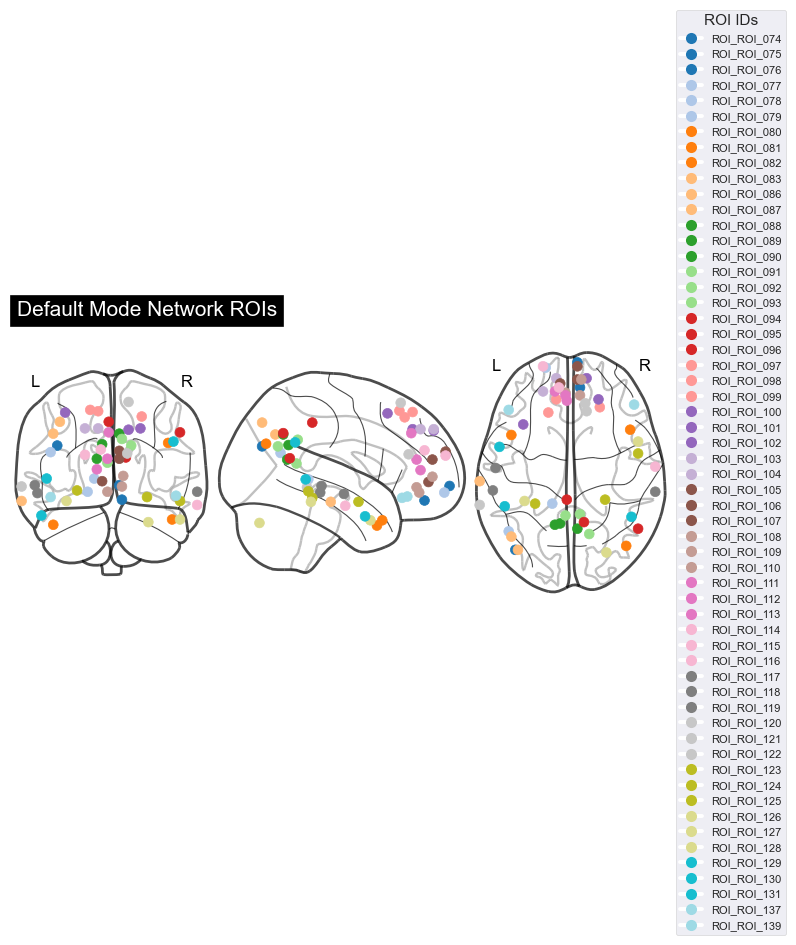

[get_dataset_dir] Dataset found in /Users/xiaoqianxiao/nilearn_data/fsl
[get_dataset_dir] Dataset found in /Users/xiaoqianxiao/nilearn_data/fsl
Cortical atlas shape: (91, 109, 91)
Cortical affine:
 [[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
Subcortical atlas shape: (91, 109, 91)
Subcortical affine:
 [[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]

Testing with known coordinate: (0, -36, 30)
MNI coord: (0, -36, 30), Voxel coord: [45 45 51]
Atlas value: 30.0
Cortical label: Cingulate Gyrus, posterior division
MNI coord: (0, -36, 30), Voxel coord: [45 45 51]
Atlas value: 2.0
Subcortical label: Left Cerebral Cortex
MNI coord: (-41.0, -75.0, 26.0), Voxel coord: [24 26 49]
Atlas value: 22.0
MNI coord: (-41.0, -75.0, 26.0), Voxel coord: [24 26 49]
Atlas value: 2.0
MNI coord: (6.0, 67.0, -4.0), Voxel coord: [48 96 34]
Atlas value: 1.0
MNI coord: (6.0, 67.0, -4.0), Voxe

/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/1147863863.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMN['Cortical_Label'] = cortical_labels
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/1147863863.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMN['Subcortical_Label'] = subcortical_labels


In [56]:
df_DMN = roi_df.loc[roi_df['network'] == 'Default']
# Plot Default Mode Network ROIs using nilearn with different colors
import pandas as pd
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from io import StringIO

# Extract MNI coordinates and ROI IDs
coords = df_DMN[['X', 'Y', 'Z']].values
roi_ids = df_DMN['ROI_ID'].values

# Create a diagonal adjacency matrix (no connections, only nodes)
n_rois = len(coords)
adjacency_matrix = np.zeros((n_rois, n_rois))

# Generate colors for each ROI using a colormap
cmap = plt.get_cmap('tab20')  # 'tab20' has 20 distinct colors, suitable for 20 ROIs
colors = [cmap(i / n_rois) for i in range(n_rois)]

# Plot ROIs as nodes on a brain template
display = plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=coords,
    node_size=50,  # Size of the spheres
    title="Default Mode Network ROIs",
    display_mode='ortho',  # Orthogonal view (sagittal, coronal, axial)
    colorbar=False,
    node_color=colors,  # Assign different colors to each ROI
    alpha=0.7
)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'ROI_{roi_id}',
                          markerfacecolor=colors[i], markersize=8)
                   for i, roi_id in enumerate(roi_ids)]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
           title="ROI IDs", fontsize=8)

# Show the plot
plotting.show()


In [58]:
# Load the Harvard-Oxford cortical and subcortical atlases
cortical_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
subcortical_atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm')

# Load atlas images explicitly
cortical_img = load_img(cortical_atlas.maps)
subcortical_img = load_img(subcortical_atlas.maps)

# Print atlas info for debugging
print("Cortical atlas shape:", cortical_img.shape)
print("Cortical affine:\n", cortical_img.affine)
print("Subcortical atlas shape:", subcortical_img.shape)
print("Subcortical affine:\n", subcortical_img.affine)

# Revised function to get atlas label for a given MNI coordinate
def get_atlas_label(coord, atlas_img, atlas_labels):
    # Convert MNI coordinates to voxel space using inverse affine
    voxel_coord = image.coord_transform(coord[0], coord[1], coord[2], 
                                        np.linalg.inv(atlas_img.affine))
    voxel_coord = np.round(voxel_coord).astype(int)
    
    # Debug: Print coordinates for verification
    print(f"MNI coord: {coord}, Voxel coord: {voxel_coord}")
    
    # Check if voxel coordinates are within the atlas dimensions
    if (0 <= voxel_coord[0] < atlas_img.shape[0] and 
        0 <= voxel_coord[1] < atlas_img.shape[1] and 
        0 <= voxel_coord[2] < atlas_img.shape[2]):
        # Get the atlas value at the voxel
        atlas_value = atlas_img.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2]]
        print(f"Atlas value: {atlas_value}")
        # Return the corresponding label
        return atlas_labels[int(atlas_value)] if int(atlas_value) < len(atlas_labels) else "No labeled region"
    else:
        return "Outside atlas bounds"
# Initialize lists to store labels
cortical_labels = []
subcortical_labels = []

# Process each ROI's coordinates
for _, row in df_DMN.iterrows():
    coord = (row['X'], row['Y'], row['Z'])
    
    # Get cortical label
    cortical_label = get_atlas_label(coord, cortical_img, cortical_atlas.labels)
    cortical_labels.append(cortical_label)
    
    # Get subcortical label
    subcortical_label = get_atlas_label(coord, subcortical_img, subcortical_atlas.labels)
    subcortical_labels.append(subcortical_label)

# Add labels to the DataFrame
df_DMN['Cortical_Label'] = cortical_labels
df_DMN['Subcortical_Label'] = subcortical_labels
df_DMN

[get_dataset_dir] Dataset found in /Users/xiaoqianxiao/nilearn_data/fsl
[get_dataset_dir] Dataset found in /Users/xiaoqianxiao/nilearn_data/fsl
Cortical atlas shape: (91, 109, 91)
Cortical affine:
 [[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
Subcortical atlas shape: (91, 109, 91)
Subcortical affine:
 [[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
MNI coord: (-41.0, -75.0, 26.0), Voxel coord: [24 26 49]
Atlas value: 22.0
MNI coord: (-41.0, -75.0, 26.0), Voxel coord: [24 26 49]
Atlas value: 2.0
MNI coord: (6.0, 67.0, -4.0), Voxel coord: [48 96 34]
Atlas value: 1.0
MNI coord: (6.0, 67.0, -4.0), Voxel coord: [48 96 34]
Atlas value: 13.0
MNI coord: (8.0, 48.0, -15.0), Voxel coord: [49 87 28]
Atlas value: 25.0
MNI coord: (8.0, 48.0, -15.0), Voxel coord: [49 87 28]
Atlas value: 12.0
MNI coord: (-13.0, -40.0, 1.0), Voxel coord: [38 43 36]
Atlas value: 0.0
MNI coord: (-

/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/1788222664.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMN['Cortical_Label'] = cortical_labels
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/1788222664.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMN['Subcortical_Label'] = subcortical_labels


,ROI_ID,network,X,Y,Z,MNI_Coordinates,Cortical_Label,Subcortical_Label
73,ROI_074,Default,-41.0,-75.0,26.0,"(-41.0, -75.0, 26.0)","Lateral Occipital Cortex, superior division",Left Cerebral Cortex
74,ROI_075,Default,6.0,67.0,-4.0,"(6.0, 67.0, -4.0)",Frontal Pole,Right Cerebral Cortex
75,ROI_076,Default,8.0,48.0,-15.0,"(8.0, 48.0, -15.0)",Frontal Medial Cortex,Right Cerebral White Matter
76,ROI_077,Default,-13.0,-40.0,1.0,"(-13.0, -40.0, 1.0)",Background,Left Hippocampus
77,ROI_078,Default,-18.0,63.0,-9.0,"(-18.0, 63.0, -9.0)",Frontal Pole,Left Cerebral Cortex
78,ROI_079,Default,-46.0,-61.0,21.0,"(-46.0, -61.0, 21.0)","Lateral Occipital Cortex, superior division",Left Cerebral Cortex
79,ROI_080,Default,43.0,-72.0,28.0,"(43.0, -72.0, 28.0)","Lateral Occipital Cortex, superior division",Right Cerebral Cortex
80,ROI_081,Default,-44.0,12.0,-34.0,"(-44.0, 12.0, -34.0)",Temporal Pole,Left Cerebral Cortex
81,ROI_082,Default,46.0,16.0,-30.0,"(46.0, 16.0, -30.0)",Temporal Pole,Right Cerebral Cortex
82,ROI_083,Default,-68.0,-23.0,-16.0,"(-68.0, -23.0, -16.0)","Middle Temporal Gyrus, posterior division",Left Cerebral Cortex


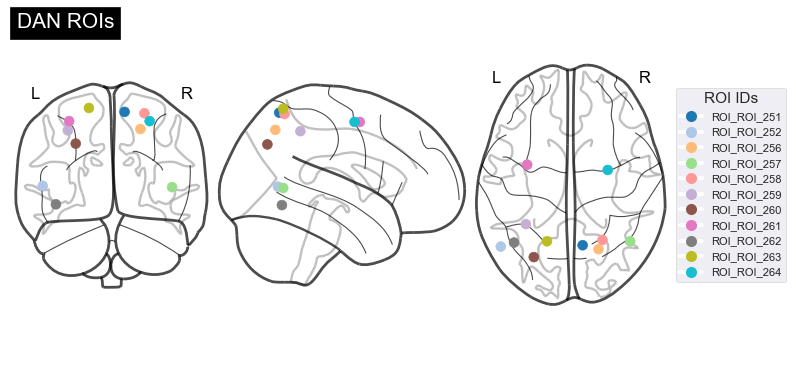

In [64]:
df_DAN = roi_df.loc[roi_df['network'] == 'Dorsal']
# Plot Default Mode Network ROIs using nilearn with different colors
import pandas as pd
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from io import StringIO

# Extract MNI coordinates and ROI IDs
coords = df_DAN[['X', 'Y', 'Z']].values
roi_ids = df_DAN['ROI_ID'].values

# Create a diagonal adjacency matrix (no connections, only nodes)
n_rois = len(coords)
adjacency_matrix = np.zeros((n_rois, n_rois))

# Generate colors for each ROI using a colormap
cmap = plt.get_cmap('tab20')  # 'tab20' has 20 distinct colors, suitable for 20 ROIs
colors = [cmap(i / n_rois) for i in range(n_rois)]

# Plot ROIs as nodes on a brain template
display = plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=coords,
    node_size=50,  # Size of the spheres
    title="DAN ROIs",
    display_mode='ortho',  # Orthogonal view (sagittal, coronal, axial)
    colorbar=False,
    node_color=colors,  # Assign different colors to each ROI
    alpha=0.7
)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'ROI_{roi_id}',
                          markerfacecolor=colors[i], markersize=8)
                   for i, roi_id in enumerate(roi_ids)]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
           title="ROI IDs", fontsize=8)

# Show the plot
plotting.show()


In [65]:
cortical_labels = []
subcortical_labels = []

# Process each ROI's coordinates
for _, row in df_DAN.iterrows():
    coord = (row['X'], row['Y'], row['Z'])
    
    # Get cortical label
    cortical_label = get_atlas_label(coord, cortical_img, cortical_atlas.labels)
    cortical_labels.append(cortical_label)
    
    # Get subcortical label
    subcortical_label = get_atlas_label(coord, subcortical_img, subcortical_atlas.labels)
    subcortical_labels.append(subcortical_label)

# Add labels to the DataFrame
df_DAN['Cortical_Label'] = cortical_labels
df_DAN['Subcortical_Label'] = subcortical_labels
df_DAN

MNI coord: (10.0, -62.0, 61.0), Voxel coord: [50 32 66]
Atlas value: 22.0
MNI coord: (10.0, -62.0, 61.0), Voxel coord: [50 32 66]
Atlas value: 13.0
MNI coord: (-52.0, -63.0, 5.0), Voxel coord: [19 32 38]
Atlas value: 13.0
MNI coord: (-52.0, -63.0, 5.0), Voxel coord: [19 32 38]
Atlas value: 2.0
MNI coord: (22.0, -65.0, 48.0), Voxel coord: [56 30 60]
Atlas value: 22.0
MNI coord: (22.0, -65.0, 48.0), Voxel coord: [56 30 60]
Atlas value: 12.0
MNI coord: (46.0, -59.0, 4.0), Voxel coord: [68 34 38]
Atlas value: 13.0
MNI coord: (46.0, -59.0, 4.0), Voxel coord: [68 34 38]
Atlas value: 13.0
MNI coord: (25.0, -58.0, 60.0), Voxel coord: [58 34 66]
Atlas value: 22.0
MNI coord: (25.0, -58.0, 60.0), Voxel coord: [58 34 66]
Atlas value: 13.0
MNI coord: (-33.0, -46.0, 47.0), Voxel coord: [28 40 60]
Atlas value: 18.0
MNI coord: (-33.0, -46.0, 47.0), Voxel coord: [28 40 60]
Atlas value: 2.0
MNI coord: (-27.0, -71.0, 37.0), Voxel coord: [32 28 54]
Atlas value: 22.0
MNI coord: (-27.0, -71.0, 37.0), Voxel 

/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/2853479780.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DAN['Cortical_Label'] = cortical_labels
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_3620/2853479780.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DAN['Subcortical_Label'] = subcortical_labels


,ROI_ID,network,X,Y,Z,MNI_Coordinates,Cortical_Label,Subcortical_Label
250,ROI_251,Dorsal,10.0,-62.0,61.0,"(10.0, -62.0, 61.0)","Lateral Occipital Cortex, superior division",Right Cerebral Cortex
251,ROI_252,Dorsal,-52.0,-63.0,5.0,"(-52.0, -63.0, 5.0)","Middle Temporal Gyrus, temporooccipital part",Left Cerebral Cortex
255,ROI_256,Dorsal,22.0,-65.0,48.0,"(22.0, -65.0, 48.0)","Lateral Occipital Cortex, superior division",Right Cerebral White Matter
256,ROI_257,Dorsal,46.0,-59.0,4.0,"(46.0, -59.0, 4.0)","Middle Temporal Gyrus, temporooccipital part",Right Cerebral Cortex
257,ROI_258,Dorsal,25.0,-58.0,60.0,"(25.0, -58.0, 60.0)","Lateral Occipital Cortex, superior division",Right Cerebral Cortex
258,ROI_259,Dorsal,-33.0,-46.0,47.0,"(-33.0, -46.0, 47.0)",Superior Parietal Lobule,Left Cerebral Cortex
259,ROI_260,Dorsal,-27.0,-71.0,37.0,"(-27.0, -71.0, 37.0)","Lateral Occipital Cortex, superior division",Left Cerebral Cortex
260,ROI_261,Dorsal,-32.0,-1.0,54.0,"(-32.0, -1.0, 54.0)",Middle Frontal Gyrus,Left Cerebral Cortex
261,ROI_262,Dorsal,-42.0,-60.0,-9.0,"(-42.0, -60.0, -9.0)","Inferior Temporal Gyrus, temporooccipital part",Left Cerebral Cortex
262,ROI_263,Dorsal,-17.0,-59.0,64.0,"(-17.0, -59.0, 64.0)",Superior Parietal Lobule,Left Cerebral Cortex
